In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.8 MB/s 
     |████████████████████████████████| 7.6 MB 33.5 MB/s 
     |████████████████████████████████| 163 kB 55.4 MB/s 


# Get contextual word embedding

In [ ]:
from transformers import pipeline

In [ ]:
import numpy as np
import torch
from transformers import RobertaTokenizer, AutoModel,RobertaForMaskedLM,AutoTokenizer


def get_word_idx(sent: str, word: str):
    return sent.split(" ").index(word)


def get_hidden_states(encoded, token_ids_word, model, layers):
    """Push input IDs through model. Stack and sum `layers` (last four by default).
    Select only those subword token outputs that belong to our word of interest
    and average them."""
    with torch.no_grad():
        output = model(**encoded)

    # Get all hidden states
    states = output.hidden_states
    # Stack and sum all requested layers
    output = torch.stack([states[i] for i in layers]).sum(0).squeeze()
    # Only select the tokens that constitute the requested word
    word_tokens_output = output[token_ids_word]

    return word_tokens_output.mean(dim=0)


def get_word_vector(sent, idx, tokenizer, model, layers):
    """Get a word vector by first tokenizing the input sentence, getting all token idxs
    that make up the word of interest, and then `get_hidden_states`."""
    encoded = tokenizer.encode_plus(sent, return_tensors="pt")
    # get all token idxs that belong to the word of interest
    token_ids_word = np.where(np.array(encoded.word_ids()) == idx)

    return get_hidden_states(encoded, token_ids_word, model, layers)

In [ ]:
 #load MAEBERT model from huggingface
MARBERT_tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/MARBERT")
MARBERT_model = AutoModel.from_pretrained("UBC-NLP/MARBERT") 

Some weights of the model checkpoint at UBC-NLP/MARBERT were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Test word similarity with cosine similarity sklearn

In [ ]:
# Use last four layers by default

layers = [-4, -3, -2, -1] 
tokenizer = AutoTokenizer.from_pretrained('UBC-NLP/MARBERT', max_len=512)
model = AutoModel.from_pretrained("UBC-NLP/MARBERT", output_hidden_states=True)

# sent = "الحباه حلوه" 
# idx = get_word_idx(sent, "حلوه")

# word_embedding = get_word_vector(sent, idx, tokenizer, model, layers)
# word_embedding 

Some weights of the model checkpoint at UBC-NLP/MARBERT were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# sent2 = "الحباه معفنه" 
# idx2 = get_word_idx(sent2, "معفنه")

# word_embedding2 = get_word_vector(sent2, idx2, tokenizer, model, layers)

# sent3 = "الحباه جميله" 
# idx3 = get_word_idx(sent3, "جميله")

# word_embedding3 = get_word_vector(sent3, idx3, tokenizer, model, layers)

In [ ]:
# word_embedding = np.array(word_embedding).reshape(1,-1)
# word_embedding2 = np.array(word_embedding2).reshape(1,-1)
# word_embedding3 = np.array(word_embedding3).reshape(1,-1)
# word_embedding.shape

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# cosine_similarity(word_embedding,word_embedding2)

In [ ]:
# cosine_similarity(word_embedding,word_embedding3)

#Read data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("clean_file.xlsx")

In [ ]:
data.columns.values[0] = "Text"

In [ ]:
sample = data.sample(n = 100, random_state=0)
sample

,Text
875680,المقاولون نادي يحير العقل عنده ملعب ودعم مالي ...
1046905,0واله الموضوع قهر وصدمه اصلهم صدقوا كلام القيع...
646861,فضائح المسئولين على الجرائد والفضائيات ولا أحد...
704385,مازالت لعبه الشعب السازج تمارس و كانها الشغل ا...
798051,العميد سابقا بينكر فضل المصرى علية نس أوم أنى ...
...,...
375963,القس السابق الإندونيسي من أصل هولندي رحمة بورنومو
170943,وأنا شايفك بصراحة أم الكوسة والقلقاس
572488,فى البداية الخضرا عملت الى عليها تماما وهو الاتى
464589,مش مكسوفين لما اسم مصر هوا البلد الوحيد الى جن...


In [ ]:
data.Text

0                      ربنا يستر عليهم بعد الاكلة الجامدة دى
1                           و نعم القدوة الرياضية  حاجة تكسف
2          عزومة فسيخ ولا منشطات لزوم تظبيط ماتش المقاولي...
3          وأوعى تنسى محمد عامر ومختار مختار وهانى العقبى...
4          الي صاحب التعليق  يا اهبل اتكسف علي دمك جتك ست...
                                 ...                        
1048569    0بصراحة كثرت الفتاوى و اصبحت داءا ايتلي به دين...
1048570                          كل مرة نسمع فتاوي شكل و لون
1048571         مرة عن رمضان و مرة عن الحجاب و مرة عن النقاب
1048572                                   انا متنقبة و سعيدة
1048573                                     تحياتي لكم جميعا
Name: Text, Length: 1048574, dtype: object

#Word Embedding 

In [ ]:
import random
random.seed = 0
features = []
actual_words =[]
for sent in sample.Text:
  #sent = "الحباه حلوه" 
  try:
    words = sent.split()
    #words.append(words)
    #print(words)
    word = random.choice(words)
    actual_words.append(word)
    idx = get_word_idx(sent, word)
    word_embedding = get_word_vector(sent, idx, tokenizer, model, layers)
    print(word_embedding)
    features.append(np.array(word_embedding))
  except:
    print(sent)
    pass
#word_embedding 

Streaming output truncated to the last 5000 lines.
        -1.7012e+00,  6.4772e-02,  3.0469e+00,  2.6815e-01,  5.8963e+00,
         8.4906e-01,  1.9318e+00,  2.3047e+00, -1.6921e+00, -6.4952e-01,
        -3.7186e-01,  2.2931e+00, -3.4528e+00,  5.2021e+00,  3.0126e+00,
        -2.4999e+00,  2.7653e+00,  1.7050e+01,  5.1283e+00,  5.4246e+00,
        -4.1444e+00, -1.8329e+00, -8.3254e-01, -1.3924e+01, -1.2172e+00,
         1.3137e+00,  1.5584e+00,  2.4836e+00, -2.6113e+00, -3.1720e+00,
         1.4716e+00,  2.8322e+00,  1.6846e+00, -8.2684e-02, -2.3733e+00,
        -6.8495e+00,  1.9952e+00,  3.8099e+00, -2.6254e+00,  3.3002e+00,
        -5.2160e-01, -3.4108e+00, -3.9373e-01,  4.7981e+00, -1.0887e+00,
        -4.8767e+00, -5.4428e+00,  3.3359e+00,  2.5803e-03,  5.4790e+00,
        -1.8268e+00,  2.2800e+00,  2.6923e+00, -8.3620e+00,  2.1106e+00,
        -1.1423e+00,  1.6235e-01, -1.2718e+00, -1.8741e+00,  3.0624e-01,
         3.4607e-03, -3.0175e+00,  1.1067e-01, -3.8118e+00, -2.2630e+00,


In [ ]:
import numpy as np
features=np.array(features)

In [ ]:
features.shape

(99, 768)

#Check

##Check NAN

In [ ]:
np.any(np.isnan(features))

True

##Check Infinite

In [ ]:
np.all(np.isfinite(features))

False

In [ ]:
len(actual_words)

99

##get nan indices

In [ ]:
import numpy as np
nan_indices = []
count = 0
for i in range(len(features)):
  if np.any(np.isnan(features[i])) == True:
    nan_indices.append(i)
    features_ = np.delete(features, i, axis=0)
    del actual_words[i] 
print(np.any(np.isnan(features_)) == True)
print(nan_indices)

False
[80]


In [ ]:
len(actual_words)

98

##delete nan indices

In [ ]:
features_.shape

(98, 768)

In [ ]:
np.any(np.isnan(features_))

False

In [ ]:
np.all(np.isfinite(features))

False

##Final dataframe

In [ ]:
features_df = pd.DataFrame(features_)
features_df["words"] =actual_words
features_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,words
0,-0.921219,3.439103,5.447481,-0.252365,4.761244,0.184825,-5.554410,-2.505746,3.830114,2.005892,...,2.994354,-0.865447,-0.056002,-0.118256,0.512500,-1.939594,1.354424,-0.273118,-0.212647,المقاولون
1,1.657206,2.624892,6.947181,-0.805309,-3.471262,-0.114602,-3.613888,-2.901761,-2.430094,5.238595,...,-3.660203,-4.014060,1.261346,0.814931,-2.768995,0.014360,1.075011,2.041435,-2.905208,انه
2,3.100803,-1.450384,7.194445,-1.629761,5.451966,3.220849,-0.410603,-0.876350,-0.028608,0.309055,...,1.158063,-1.579795,0.837944,-4.466431,-0.529921,2.736868,-3.024721,2.110325,-0.993688,فضائح
3,5.015925,2.013852,5.050154,-3.030353,1.568711,3.083315,-3.925122,-3.993435,0.066438,-3.009089,...,-1.152765,-0.624859,-0.140356,-2.431472,0.907430,0.971213,2.161747,2.476149,-4.016395,مازالت
4,-1.789950,3.834936,-0.305643,2.567982,-0.680856,-1.644119,-8.473555,-0.747685,3.183745,1.033779,...,-0.754065,-5.651765,-2.480340,5.575385,-5.848564,3.022208,-2.000961,-3.366132,-5.001001,تانى
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1.369700,1.785151,0.626296,-3.131955,3.084844,1.734624,5.402126,-5.799994,-1.191400,1.265455,...,-0.233689,-1.479936,6.415851,-4.728950,-3.410994,0.046824,-0.793973,0.783860,-4.622386,السابق
94,2.330037,3.717494,0.132978,-1.342626,-4.746321,2.657367,-1.067242,1.580713,1.636512,0.784960,...,2.070869,0.605274,3.141714,-2.960442,-1.356308,3.184153,0.361031,-1.604038,-1.266680,والقلقاس
95,0.598404,6.198287,4.508451,0.027577,2.111224,3.054689,-1.859237,0.310062,1.922117,-0.199994,...,-4.722644,-2.397532,-2.474986,-2.855172,-8.045053,3.855987,-2.482032,-0.009831,4.563389,وهو
96,-0.487703,5.365752,0.756047,-6.836718,-1.777718,-1.759574,-5.847493,-3.546163,-0.819630,0.696709,...,-1.008452,-2.449981,-4.539160,-6.085199,0.878606,2.247227,2.561320,3.970672,1.547458,اسم


#K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##Fit

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=None)
    kmeans.fit(features_df.iloc[:,:-1])
    sse.append(kmeans.inertia_)

In [ ]:
sse

[642426.1875,
 597460.9375,
 577178.125,
 569698.75,
 558550.1875,
 545539.75,
 543127.375,
 532874.9375,
 529256.5,
 516474.5]

##visualize for best k

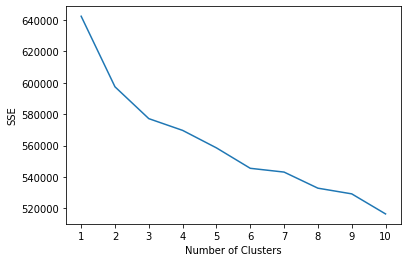

In [ ]:
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

##k means with best k

In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

In [ ]:
#fit k-means algorithm to data
kmeans.fit(features_df.iloc[:,:-1])

KMeans(init='random', n_clusters=4, random_state=1)

In [ ]:
#view cluster assignments for each observation
kmeans.labels_

array([1, 2, 1, 2, 3, 1, 2, 3, 1, 1, 1, 3, 2, 2, 2, 1, 1, 0, 3, 0, 3, 0,
       2, 2, 1, 3, 1, 3, 2, 2, 2, 0, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 3, 2, 3, 0, 1, 3, 1, 2, 1, 1, 3, 2,
       1, 3, 3, 2, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       2, 3, 1, 1, 0, 2, 1, 1, 2, 1], dtype=int32)

In [ ]:
#append cluster assingments to original DataFrame
features_df['cluster'] = kmeans.labels_

In [ ]:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(features_df.iloc[:,:-2], features_df['cluster'], metric='euclidean')

# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.028


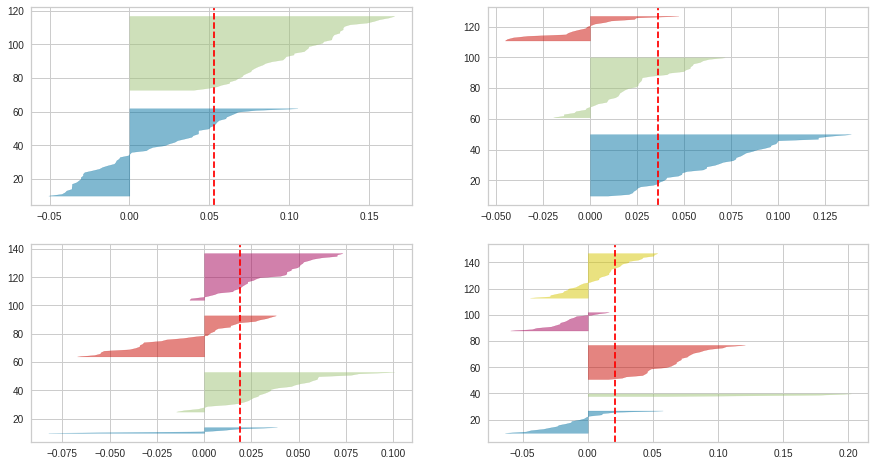

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(features_df.iloc[:,:-2])

In [ ]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,words,cluster
0,-0.921219,3.439103,5.447481,-0.252365,4.761244,0.184825,-5.554410,-2.505746,3.830114,2.005892,...,-0.865447,-0.056002,-0.118256,0.512500,-1.939594,1.354424,-0.273118,-0.212647,المقاولون,1
1,1.657206,2.624892,6.947181,-0.805309,-3.471262,-0.114602,-3.613888,-2.901761,-2.430094,5.238595,...,-4.014060,1.261346,0.814931,-2.768995,0.014360,1.075011,2.041435,-2.905208,انه,2
2,3.100803,-1.450384,7.194445,-1.629761,5.451966,3.220849,-0.410603,-0.876350,-0.028608,0.309055,...,-1.579795,0.837944,-4.466431,-0.529921,2.736868,-3.024721,2.110325,-0.993688,فضائح,1
3,5.015925,2.013852,5.050154,-3.030353,1.568711,3.083315,-3.925122,-3.993435,0.066438,-3.009089,...,-0.624859,-0.140356,-2.431472,0.907430,0.971213,2.161747,2.476149,-4.016395,مازالت,2
4,-1.789950,3.834936,-0.305643,2.567982,-0.680856,-1.644119,-8.473555,-0.747685,3.183745,1.033779,...,-5.651765,-2.480340,5.575385,-5.848564,3.022208,-2.000961,-3.366132,-5.001001,تانى,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1.369700,1.785151,0.626296,-3.131955,3.084844,1.734624,5.402126,-5.799994,-1.191400,1.265455,...,-1.479936,6.415851,-4.728950,-3.410994,0.046824,-0.793973,0.783860,-4.622386,السابق,2
94,2.330037,3.717494,0.132978,-1.342626,-4.746321,2.657367,-1.067242,1.580713,1.636512,0.784960,...,0.605274,3.141714,-2.960442,-1.356308,3.184153,0.361031,-1.604038,-1.266680,والقلقاس,1
95,0.598404,6.198287,4.508451,0.027577,2.111224,3.054689,-1.859237,0.310062,1.922117,-0.199994,...,-2.397532,-2.474986,-2.855172,-8.045053,3.855987,-2.482032,-0.009831,4.563389,وهو,1
96,-0.487703,5.365752,0.756047,-6.836718,-1.777718,-1.759574,-5.847493,-3.546163,-0.819630,0.696709,...,-2.449981,-4.539160,-6.085199,0.878606,2.247227,2.561320,3.970672,1.547458,اسم,2


#TSNE 2d

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd  
tsne = TSNE(n_components=2,random_state=0)
tsne_2d = tsne.fit_transform(features_df.iloc[:,:-2])
tsne_df = pd.DataFrame(tsne_2d, columns = ["comp-1","comp-2"])
tsne_df

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,comp-1,comp-2
0,-15.914722,-57.222614
1,-14.291800,14.721078
2,-3.172957,-13.362048
3,-4.862128,-9.112736
4,-26.013069,2.196611
...,...,...
93,-2.674702,-3.096026
94,4.824804,-12.507241
95,3.041029,4.437210
96,-23.927216,-7.611805


##Visualize

In [ ]:
features_df.iloc[:,-1]

0     1
1     2
2     1
3     2
4     3
     ..
93    2
94    1
95    1
96    2
97    1
Name: cluster, Length: 98, dtype: int32

[Text(0.5, 1.0, 'TSNE of word embedding and word labels')]

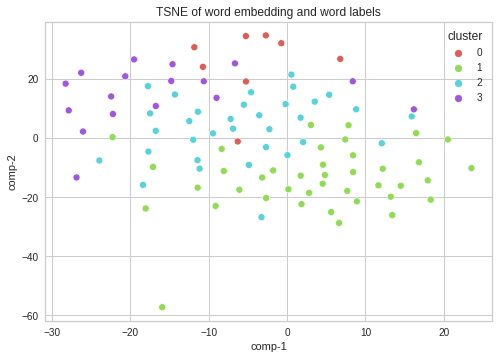

In [ ]:
#rcParams["figure.figsize"] = 25,20
sns.scatterplot(x="comp-1", y="comp-2", hue=features_df.iloc[:,-1],
                palette=sns.color_palette("hls", len(np.unique(features_df.iloc[:,-1]))),
                data=tsne_df).set(title="TSNE of word embedding and word labels")

In [ ]:
labels = features_df.loc[:,["words"]]
labels.iloc[1,0]

'انه'

In [ ]:
pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade arabic-reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


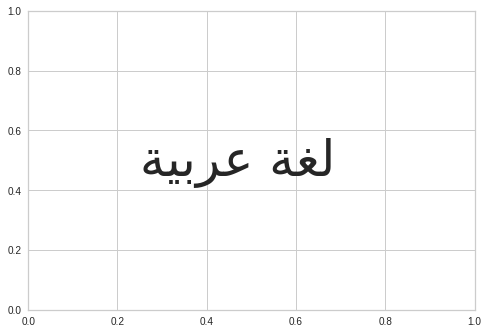

In [ ]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = arabic_reshaper.reshape(u'لغةٌ عربيّة')
artext = get_display(reshaped_text)

plt.text(0.25, 0.45, artext , name = 'Times New Roman',fontsize=50)
plt.show()

In [ ]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,words,cluster
0,-0.921219,3.439103,5.447481,-0.252365,4.761244,0.184825,-5.554410,-2.505746,3.830114,2.005892,...,-0.865447,-0.056002,-0.118256,0.512500,-1.939594,1.354424,-0.273118,-0.212647,المقاولون,1
1,1.657206,2.624892,6.947181,-0.805309,-3.471262,-0.114602,-3.613888,-2.901761,-2.430094,5.238595,...,-4.014060,1.261346,0.814931,-2.768995,0.014360,1.075011,2.041435,-2.905208,انه,2
2,3.100803,-1.450384,7.194445,-1.629761,5.451966,3.220849,-0.410603,-0.876350,-0.028608,0.309055,...,-1.579795,0.837944,-4.466431,-0.529921,2.736868,-3.024721,2.110325,-0.993688,فضائح,1
3,5.015925,2.013852,5.050154,-3.030353,1.568711,3.083315,-3.925122,-3.993435,0.066438,-3.009089,...,-0.624859,-0.140356,-2.431472,0.907430,0.971213,2.161747,2.476149,-4.016395,مازالت,2
4,-1.789950,3.834936,-0.305643,2.567982,-0.680856,-1.644119,-8.473555,-0.747685,3.183745,1.033779,...,-5.651765,-2.480340,5.575385,-5.848564,3.022208,-2.000961,-3.366132,-5.001001,تانى,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1.369700,1.785151,0.626296,-3.131955,3.084844,1.734624,5.402126,-5.799994,-1.191400,1.265455,...,-1.479936,6.415851,-4.728950,-3.410994,0.046824,-0.793973,0.783860,-4.622386,السابق,2
94,2.330037,3.717494,0.132978,-1.342626,-4.746321,2.657367,-1.067242,1.580713,1.636512,0.784960,...,0.605274,3.141714,-2.960442,-1.356308,3.184153,0.361031,-1.604038,-1.266680,والقلقاس,1
95,0.598404,6.198287,4.508451,0.027577,2.111224,3.054689,-1.859237,0.310062,1.922117,-0.199994,...,-2.397532,-2.474986,-2.855172,-8.045053,3.855987,-2.482032,-0.009831,4.563389,وهو,1
96,-0.487703,5.365752,0.756047,-6.836718,-1.777718,-1.759574,-5.847493,-3.546163,-0.819630,0.696709,...,-2.449981,-4.539160,-6.085199,0.878606,2.247227,2.561320,3.970672,1.547458,اسم,2


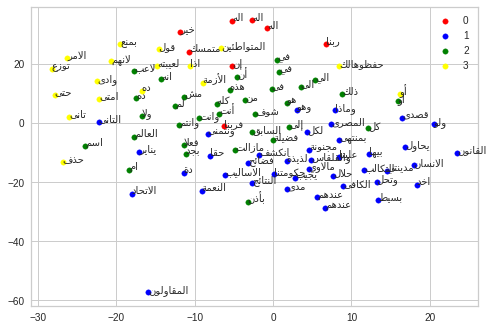

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = tsne_df.iloc[:,0].values
scatter_y = tsne_df.iloc[:,1].values
group = features_df.iloc[:,-1].values
cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 30)
ax.legend()
# plt.show()
for i, value in enumerate(tsne_df.values):
    x = value[0]
    y = value[1]
    reshaped_text = arabic_reshaper.reshape(labels.iloc[i,0])
    artext = get_display(reshaped_text)
    # plt.text(artext,
    #                 xy=(x, y),
    #                 xytext=(5, 2),
    #                 textcoords='offset points',
    #                 ha='right',
    #                 va='bottom')
    plt.text(x, y, artext , name = 'Times New Roman',fontsize=10)

plt.show()

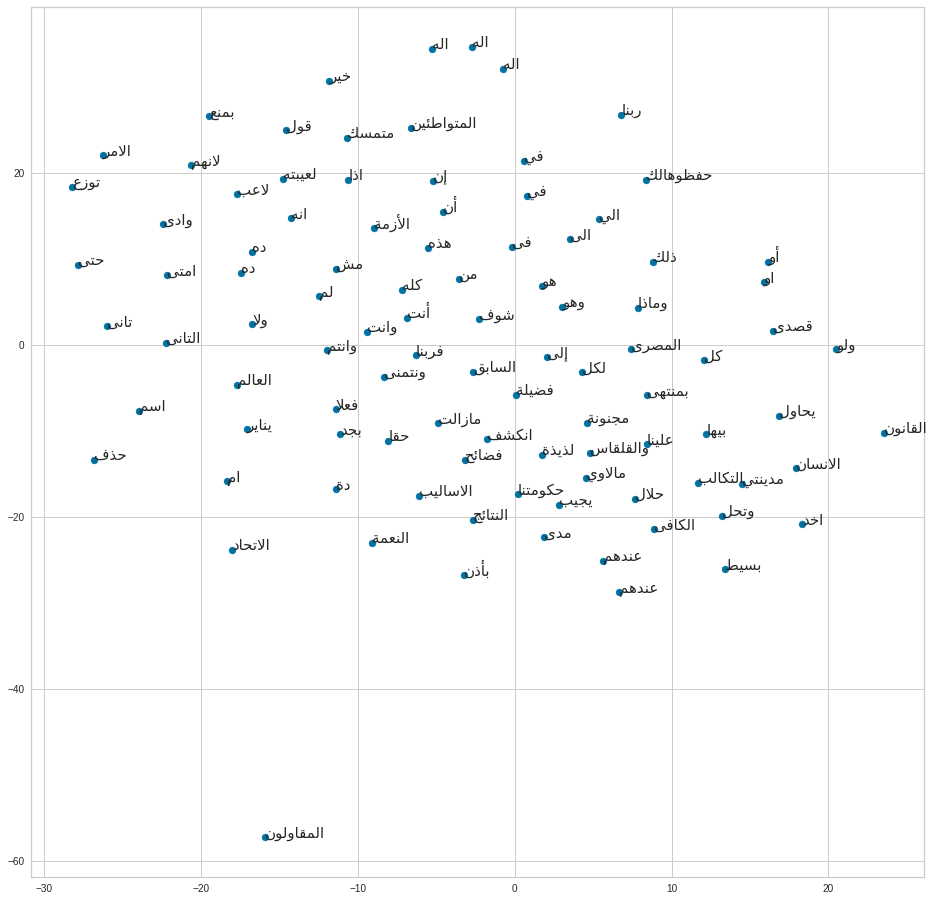

In [ ]:
import matplotlib.pyplot as plt
colors = {'0':'red', '1':'green', '2':'blue', '3':'yellow'}
plt.figure(figsize=(16, 16)) 
plt.scatter(tsne_df.iloc[:,0],tsne_df.iloc[:,1],cmap= features_df.iloc[:,-1]])
for i, value in enumerate(tsne_df.values):
    x = value[0]
    y = value[1]
    reshaped_text = arabic_reshaper.reshape(labels.iloc[i,0])
    artext = get_display(reshaped_text)
    # plt.text(artext,
    #                 xy=(x, y),
    #                 xytext=(5, 2),
    #                 textcoords='offset points',
    #                 ha='right',
    #                 va='bottom')
    plt.text(x, y, artext , name = 'Times New Roman',fontsize=15)
        
plt.show()